In [1]:
import torch
from torch import nn
import torch.nn.functional as F

import glog
import json
import numpy as np
import pandas as pd

import sys
sys.path.append("../")
import xfinai_config
from utils import path_wrapper, base_io
from model_evaluator import RecurrentModelEvaluator
%matplotlib inline

## 1 Define Models

In [2]:
from model_layer.model_hub import RNN, LSTM, GRU

## 1 Eval Models On IC

I0326 19:25:49.069441 13244 model_evaluator.py:97] Start Eval Model RNN On IC
I0326 19:25:57.290412 13244 model_evaluator.py:103] Plot Result RNN IC 训练集
I0326 19:25:57.469442 13244 model_evaluator.py:106] Calc Metrics RNN IC 训练集
I0326 19:26:02.779713 13244 model_evaluator.py:103] Plot Result RNN IC 验证集
I0326 19:26:02.940715 13244 model_evaluator.py:106] Calc Metrics RNN IC 验证集
I0326 19:26:07.664885 13244 model_evaluator.py:103] Plot Result RNN IC 测试集
I0326 19:26:07.837887 13244 model_evaluator.py:106] Calc Metrics RNN IC 测试集
I0326 19:26:07.840886 13244 model_evaluator.py:113] Save metrics result to D:/projects/XFinAI/result/inference_result/ic/RNN/metrics.csv
I0326 19:26:07.843890 13244 model_evaluator.py:116] End Eval Model RNN On IC


                   训练集           验证集           测试集
MAE       5.773547e-04  8.697636e-04  1.193085e-03
MSE       6.370962e-07  1.859669e-06  3.060116e-06
MAPE      4.428815e+10  3.522889e+10  2.872798e+10
R_SQUARE -4.026337e-01 -2.566578e-01 -1.553091e-01


I0326 19:26:09.218887 13244 model_evaluator.py:97] Start Eval Model GRU On IC
W0326 19:26:13.364714 13244 warnings.py:109] D:\Anaconda\envs\nni\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.17088626278010194 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "

I0326 19:26:15.121707 13244 model_evaluator.py:103] Plot Result GRU IC 训练集
I0326 19:26:15.323735 13244 model_evaluator.py:106] Calc Metrics GRU IC 训练集
W0326 19:26:19.659871 13244 warnings.py:109] D:\Anaconda\envs\nni\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.17088626278010194 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "

I0326 19:26:20.258881 13244 model_evaluator

                   训练集           验证集           测试集
MAE       1.335358e-03  1.633818e-03  3.161198e-03
MSE       2.790794e-06  5.005393e-06  1.456563e-05
MAPE      1.565094e+11  1.100712e+11  2.758967e+11
R_SQUARE -5.146233e+00 -2.395361e+00 -4.345576e+00


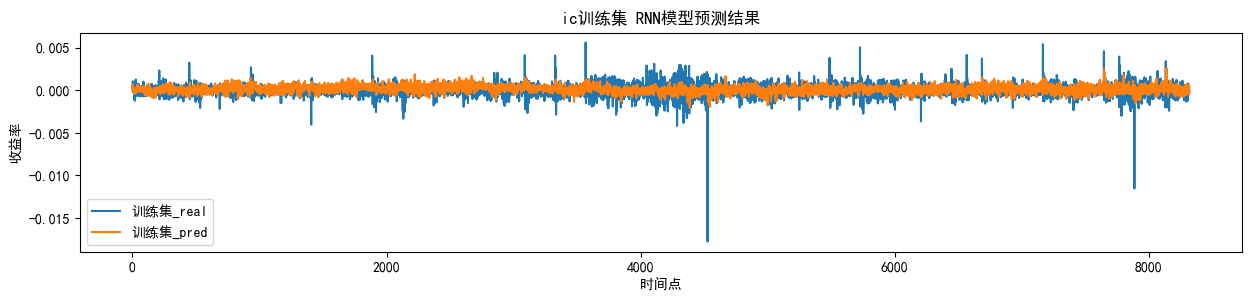

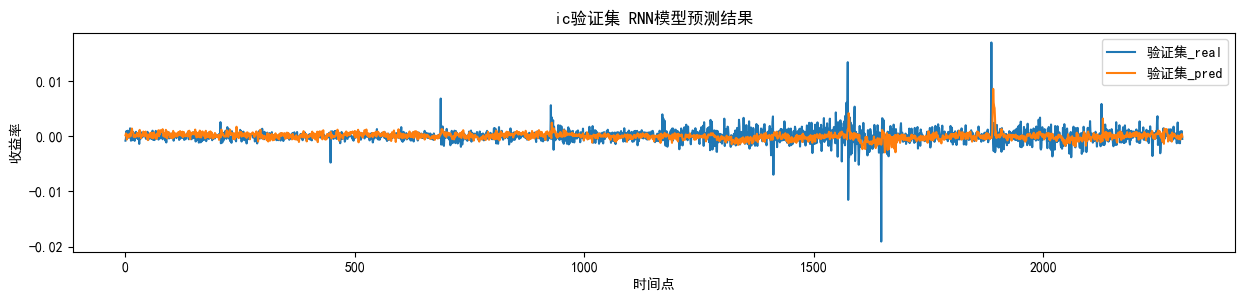

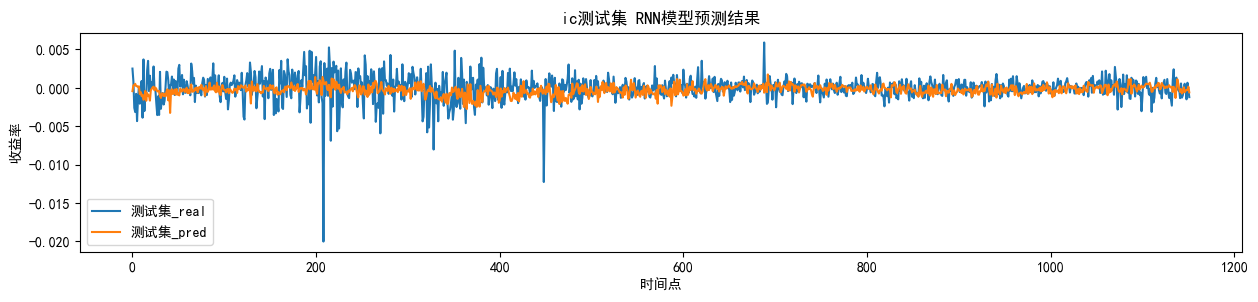

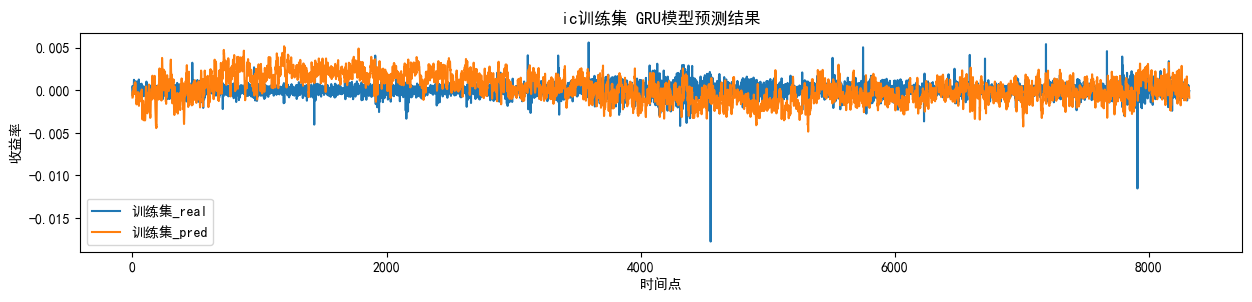

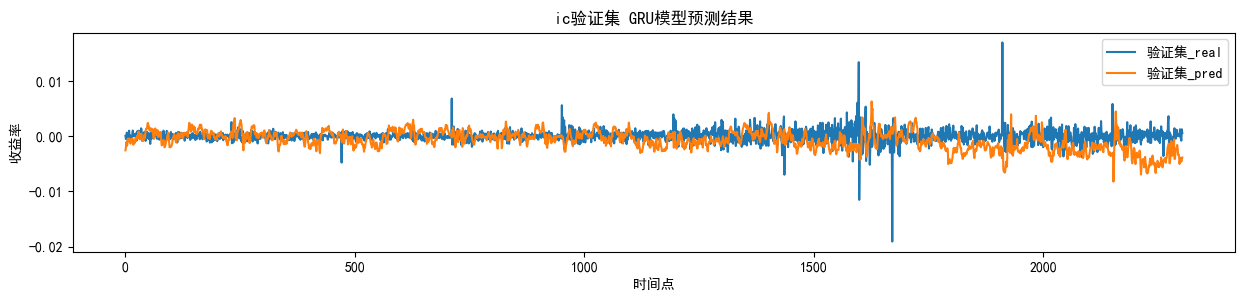

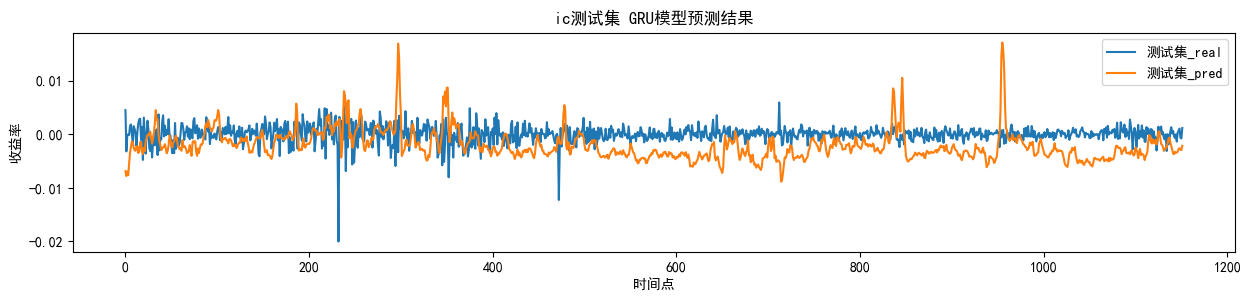

In [4]:
future_index = 'ic'

for model_class in [RNN, GRU]:
    model_name = model_class.name
    params = base_io.load_best_params(future_index, model_name)

    # Get DataLoader
    train_loader, val_loader, test_loader = base_io.get_data_loader(future_index, params)
    rme = RecurrentModelEvaluator(future_index=future_index, model_class=model_class, 
                                  train_loader=train_loader, val_loader=val_loader, test_loader=test_loader, params=params)
    rme.eval_model()